
# SIO 236 - Lab III : Data Types



### Bia Villas Bôas - avillasb@ucsd.edu


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp
from matplotlib import cm
from PIL import Image

## Problem 1

In [3]:
k = 1.38e-23 # Boltzmann's constant
h = 6.63e-34# plank's constant
c = 3.e8 # speed of light
lamb = np.linspace(1e-2,1e7,1e8)*1e-6 # wavenumber

L1 = 2*h*c**2/(lamb**5*(exp(h*c/(lamb*k*1000))-1))
L3 = 2*h*c**2/(lamb**5*(exp(h*c/(lamb*k*300))-1))
L6 = 2*h*c**2/(lamb**5*(exp(h*c/(lamb*k*6000))-1))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


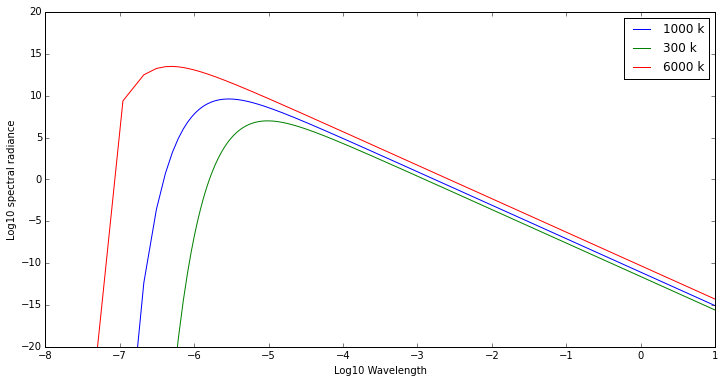

In [4]:
plt.figure(figsize=(12,6))
plt.plot(np.log10(lamb),np.log10(L1), label='1000 k')
plt.hold(True)
plt.plot(np.log10(lamb),np.log10(L3), label='300 k')
plt.plot(np.log10(lamb),np.log10(L6), label='6000 k')
plt.ylim([-20,20])
plt.xlabel('Log10 Wavelength')
plt.ylabel('Log10 spectral radiance')
plt.legend()

## Problem 2

In [6]:
f = '/Users/bia/work/PhD/coursework/Spring2016/SIO236/labs/lab03/lajolla_swab'
#fbin = np.fromfile(f,dtype='int16',count=-1 )
fbin = np.fromfile(f,dtype='int16')
data = np.reshape(fbin, (1440,3240))

### Plotting original topography map

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


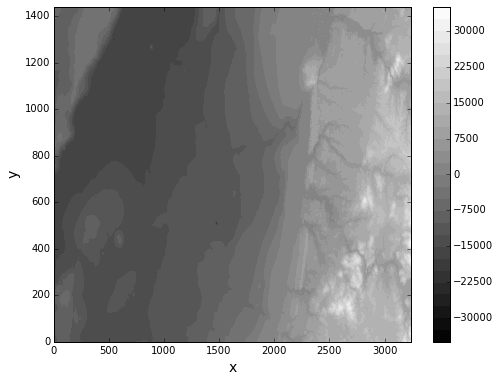

In [7]:
plt.figure(figsize=(8,6))
plt.contourf(data,30, cmap=cm.gray)
plt.colorbar()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

In [10]:
grad = np.diff(data)

### Plotting topography map after diff

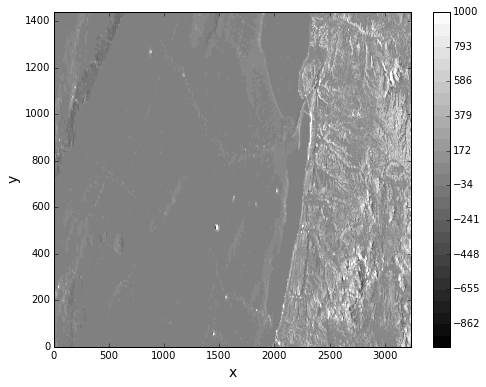

In [11]:
plt.figure(figsize=(8,6))
lin = np.linspace(-1000,1000,30)
plt.contourf(grad,lin, cmap=cm.gray)
plt.colorbar()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

## Problem 3

In [13]:
pic = '/Users/bia/work/PhD/coursework/Spring2016/SIO236/labs/lab03/Paraglider.jpg'
img = Image.open(pic) # reading image
r = np.array(img)[:,:,0] 
g = np.array(img)[:,:,1]
b = np.array(img)[:,:,2]

### Plotting original picture

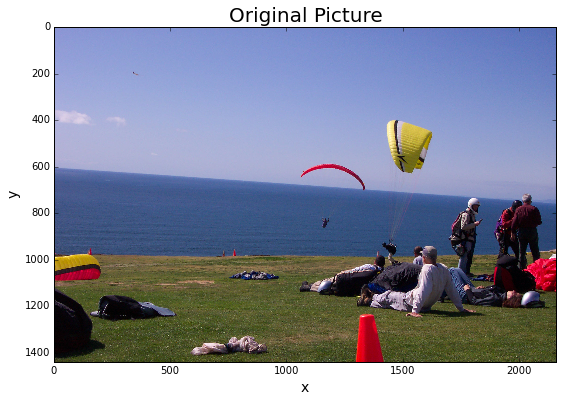

In [14]:
plt.figure(figsize=(16,6))
plt.imshow(img)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Original Picture', fontsize=20)

###  Plotting RGB components in gray scale

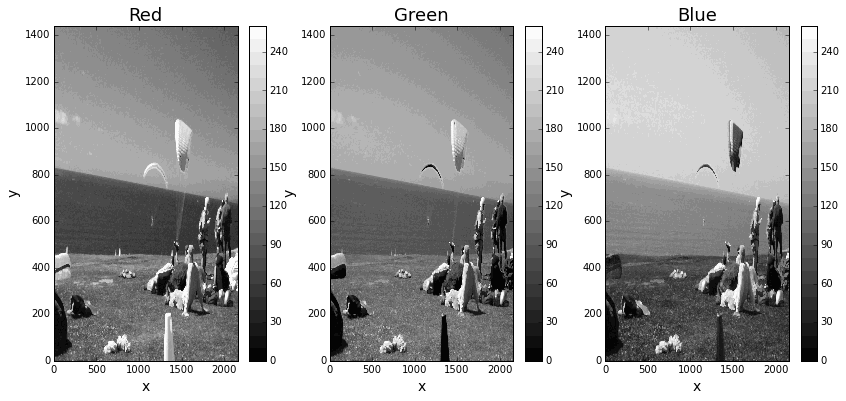

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.contourf(np.flipud(r),30,cmap=cm.gray)
plt.title('Red', fontsize = 18)
plt.colorbar()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.subplot(132)
plt.contourf(np.flipud(g),30,cmap=cm.gray)
plt.title('Green', fontsize = 18)
plt.colorbar()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.subplot(133)
plt.contourf(np.flipud(b),30,cmap=cm.gray)
plt.colorbar()
plt.title('Blue', fontsize = 18)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

In [16]:
recover = Image.fromarray(np.stack([r,g,b], axis=2))
swaprb = Image.fromarray(np.stack([b,g,r], axis=2))
swapgb = Image.fromarray(np.stack([r,b,g], axis=2))

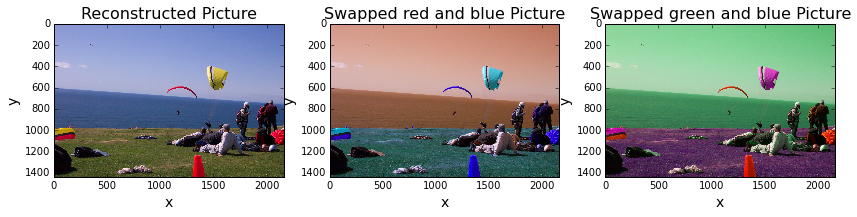

In [17]:
plt.figure(figsize=(14,16))
plt.subplot(131)
plt.imshow(recover)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Reconstructed Picture', fontsize=16)
plt.subplot(132)
plt.imshow(swaprb)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Swapped red and blue Picture', fontsize=16)
plt.subplot(133)
plt.imshow(swapgb)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Swapped green and blue Picture', fontsize=16)

In [16]:
swaprb.save('swapped_rb.png')